## Analiza składowych głównych (PCA, *ang Principal Component Analysis*)

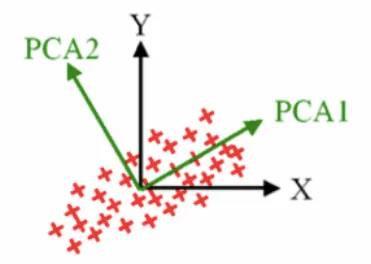

Popatrzmy na działanie algorytmu PCA na danych ze zbioru MNIST.

### Przykład I MNIST

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached wrapt-1.15.0-cp311-cp311-win_amd64.whl (36 kB)
  Using cached grpcio-1.56.0-cp311-cp311-win_amd64.whl (4.2 MB)
  U


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Zbiór MNIST można pobrać z wielu miejsc. Jest m.in. dostępny w bibliotece keras (module biblioteki tensorflow).

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Wyświetlmy kilka przykładowych obrazów, żeby zapoznać się z MNISTem

In [5]:
!pip install matplotlib

  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.41.0-cp311-cp311-win_amd64.whl (2.0 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-10.0.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


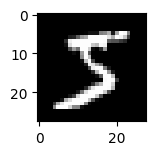

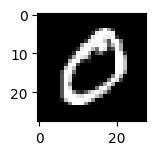

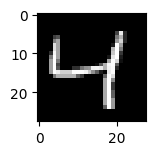

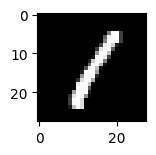

In [6]:
import matplotlib.pyplot as plt

for i in range(4):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

Popatrzmy na pojedynczy obrazek

In [9]:
!pip install pandas

  Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd

single_image = x_train[0]
pd.set_option('display.max_columns', 28)
pd.DataFrame(single_image)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


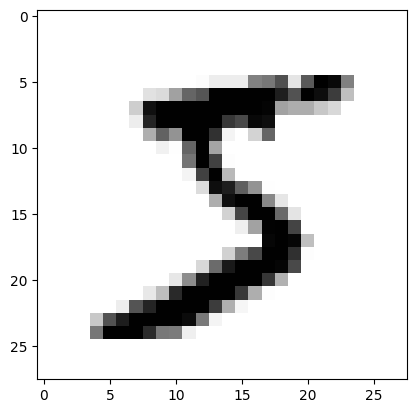

In [10]:
plt.imshow(single_image, cmap='gray_r')

Popatrzmy na etykiety


In [13]:
print(y_train)  # lista 60000 wartości

[5 0 4 ... 5 6 8]


Ok, zacznijmy przetwarzanie. 

Po pierwsze popatrzmy jeszcze raz na wymiar naszych danych. 

In [14]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Należy zmienić kształt obrazka tak, żeby był jednowymiarowym sygnałem (z 784 cechami). Dla modelu nie ma znaczenia jaki rozstawimy wartości. Model będzie po prostu szukał wzorców w sygnale, niezależnie od tego w jaki sposób ten sygnał będzie interpretowany.

In [19]:
import numpy as np
print(len(x_train))
# Reshape the 28x28 pixel images into a single 784x1 pixel vector using .reshape
x_train = np.reshape(x_train, (len(x_train), -1))/255
x_test = np.reshape(x_test, (len(x_test), -1))/255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


60000
(60000, 784) (60000,)
(10000, 784) (10000,)


Po drugie w PCA zawsze trzeba pracować z ustandaryzowanymi danymi w przeciwnym razie cecha, która ma największe wartości będzie miała dominujący wpływ.

In [23]:
!pip install scikit-learn

  Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached scipy-1.11.1-cp311-cp311-win_amd64.whl (44.0 MB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import sklearn

from sklearn.preprocessing import StandardScaler

scaled_x_train = StandardScaler().fit_transform(x_train)

Znajdźmy składowe główne

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(scaled_x_train)
x_pca

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
         1.67213833e-15,  6.78819150e-16, -1.25604678e-15],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
        -1.77846333e-15,  4.50015668e-15,  3.79326022e-15],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
         1.40720310e-17,  1.28069962e-17, -4.13753815e-18],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
         7.44545617e-18, -1.15548151e-17,  2.98204528e-18],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
        -2.22362148e-18,  3.19492146e-17,  1.17304830e-17]])

Ile mamy składowych głównych?

In [27]:
x_pca.shape

(60000, 784)

784, tyle co cech. Póki co nie robimy żadnej redukcji.

Popatrzmy jaką część zmienności tłumaczą poszczególne składowe główne

In [28]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.64671692e-02, 4.07827199e-02, 3.73938042e-02, 2.88511485e-02,
       2.52110863e-02, 2.19426996e-02, 1.92334439e-02, 1.74579923e-02,
       1.53509230e-02, 1.40171960e-02, 1.34174302e-02, 1.20374194e-02,
       1.11456955e-02, 1.08992356e-02, 1.02864922e-02, 9.94486564e-03,
       9.36383280e-03, 9.21045666e-03, 8.93436778e-03, 8.69912619e-03,
       8.27363019e-03, 8.03417369e-03, 7.64845500e-03, 7.41772464e-03,
       7.15292868e-03, 6.91846831e-03, 6.84135964e-03, 6.56674546e-03,
       6.31676724e-03, 6.12919839e-03, 5.96255295e-03, 5.87716416e-03,
       5.71591699e-03, 5.62307416e-03, 5.54682002e-03, 5.38418374e-03,
       5.31182250e-03, 5.19605602e-03, 5.08211255e-03, 4.80005571e-03,
       4.76455820e-03, 4.69139360e-03, 4.54348956e-03, 4.51345787e-03,
       4.46963401e-03, 4.43383155e-03, 4.38215469e-03, 4.30381751e-03,
       4.26877901e-03, 4.23647017e-03, 4.04696121e-03, 3.99447403e-03,
       3.97456119e-03, 3.93820800e-03, 3.85813590e-03, 3.79042674e-03,
      

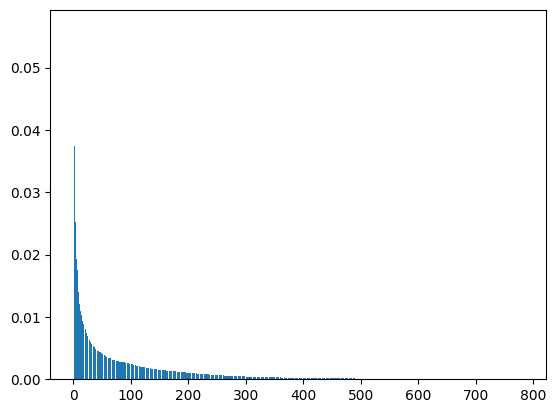

In [29]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.show()

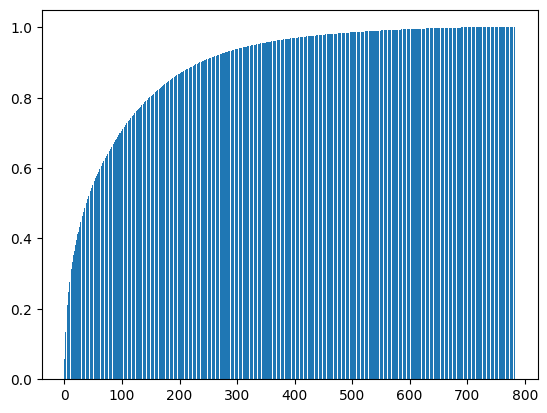

In [63]:
# kumulanta
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

Klasa PCA przyjmuje opcjonalny parametr n_components. n_components oznacza:
* jeżeli n_components > 1, liczbę składowych głównych jaką chcemy uwzględnić (zaczynając od tej, która tłumaczy najwięcej zmienności, a potem schodząc w dół)
* jeżelie 0 < n_component > 1, jaką część zmienności sygnału chcemy zachować (w tym przypadku uwzględnionych zostanie tyle składowych głównych, żeby spełniony był warunek)

Dobierzmy tak parametr n_components, żeby otrzymać tylko tyle składowe główne ile potrzeba, żeby zachować 85% zmienności sygnału. 

In [30]:
pca = PCA(n_components=0.85)
x_pca = pca.fit_transform(scaled_x_train)
x_pca

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
         2.76799832e-01,  2.52968430e-01, -4.30120958e-01],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
        -5.56854429e-01,  9.32616438e-01,  1.36548638e-01],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
         8.41963110e-01, -2.16324075e+00, -2.65064467e+00],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
         8.61622418e-01, -5.64109485e-01, -7.24422995e-01],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
         8.23470642e-01, -4.35217245e-01,  3.26716710e-02],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
         9.57927771e-01, -2.19096246e+00, -8.91056651e-01]])

In [31]:
x_pca.shape

(60000, 185)

Po wykonaniu PCA mamy zachowane 85% wariancji, przy redukcji z 784 wymiarów do 185 wymiarów. 185 składowych głównych tłumacz 85% zmienności sygnału.

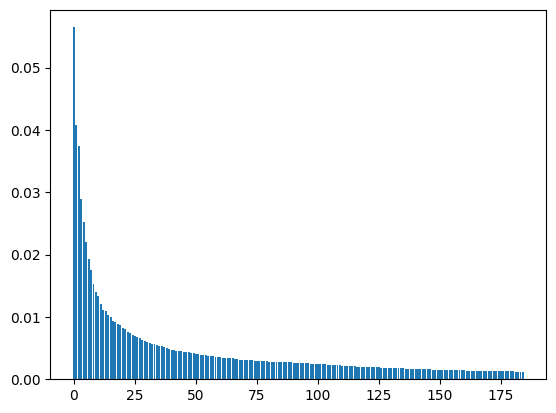

In [32]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

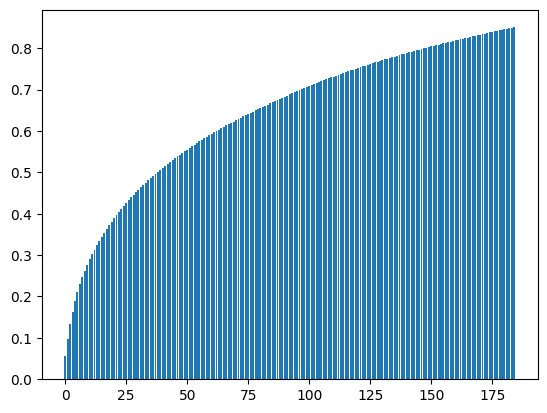

In [33]:
# kumulanta
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

Zobaczmy jak teraz wyglądają nasze próbki.

In [34]:
reduced = pca.inverse_transform(pca.fit_transform(x_train))

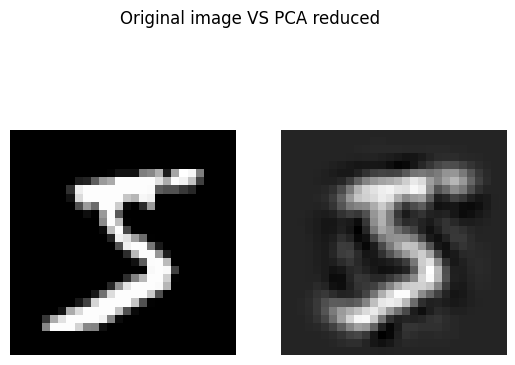

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.matshow(x_train[0].reshape(28,28), cmap='gray')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray')

ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[0]))
plt.show()

Teraz spróbujmy jeszcze użyć PCA do wizualizacji danych (czyli musimy zredukować wymiary do 2, ewentualnie 3 lub 1, tak żeby można było wynik nanieść na wykres.

<timed exec>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


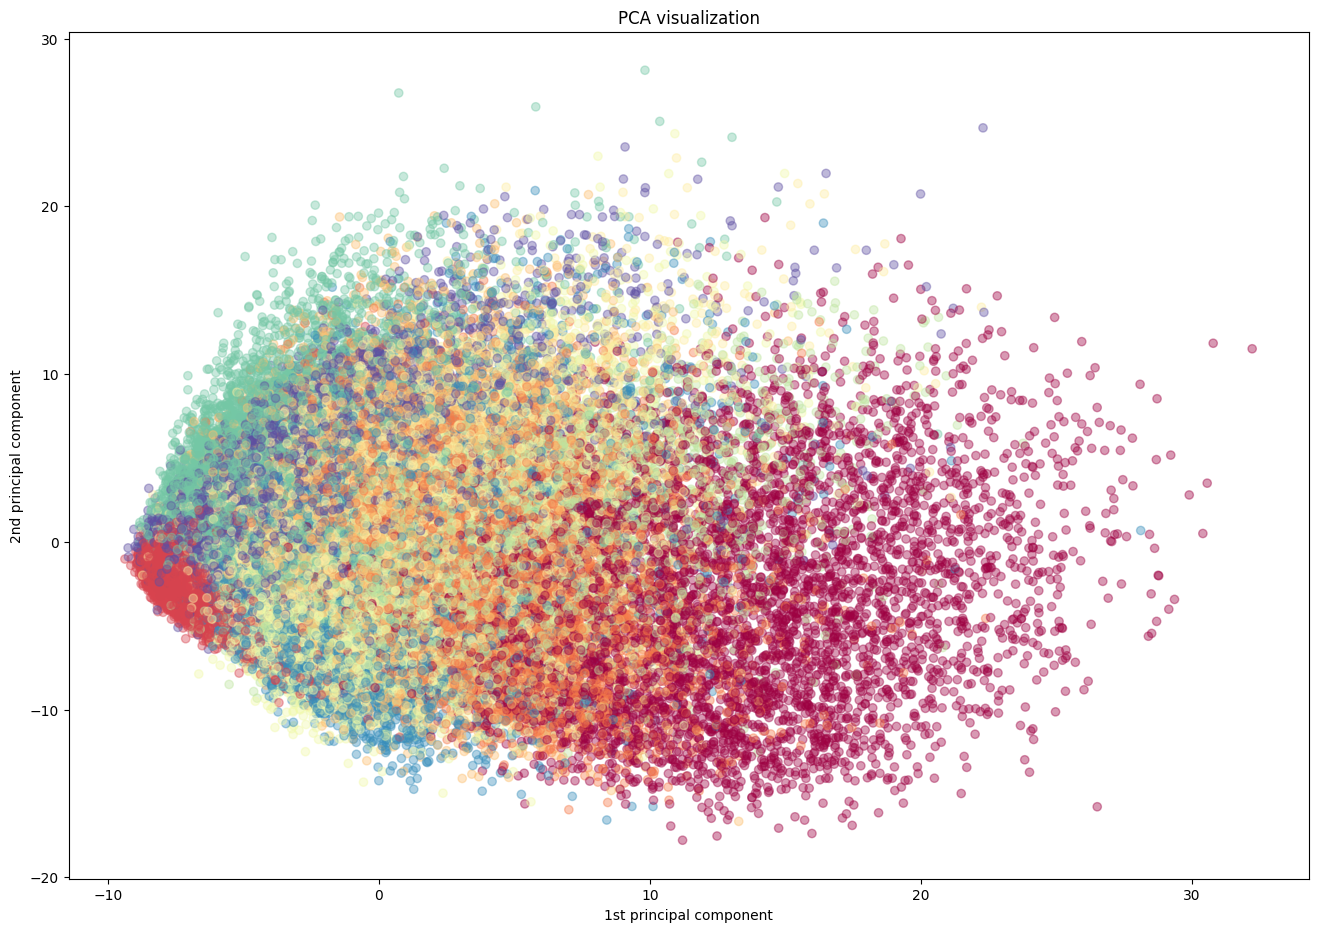

CPU times: total: 12.3 s
Wall time: 3.04 s


In [37]:
%%time

pca = PCA(n_components=2)  # redukujemy do dwóch wymiarów
pca_results = pca.fit_transform(scaled_x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=pca_results[:,0], 
    y=pca_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [38]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.05646717, 0.04078272])

Cięzko byłoby na takmi zbiorze wytyczyć krzywą decyzyjną. Jak widać nie po to uruchamiamy PCA, żeby polepszyć separowalność danych. Gdbyśmy chcieli zachować jak nalepszą separowalność danych zamiast PCA lepiej jest użyć metody t-SNE lub UMAP.

### Przykład II Iris dataset

Zbiór Irs dataset znajduje się pod adresem https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data i przedstawia pomiary płatków wykonane na trzech gatunków irysów.

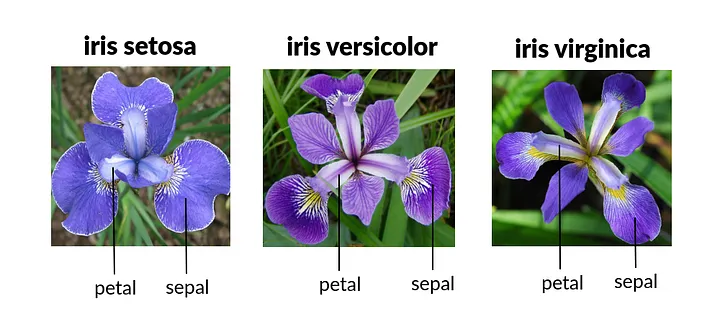

Mierzone był wymiary dwóch płatków oraz zbierana informacja o tym jakiego gatunku dotyczy pomiar.

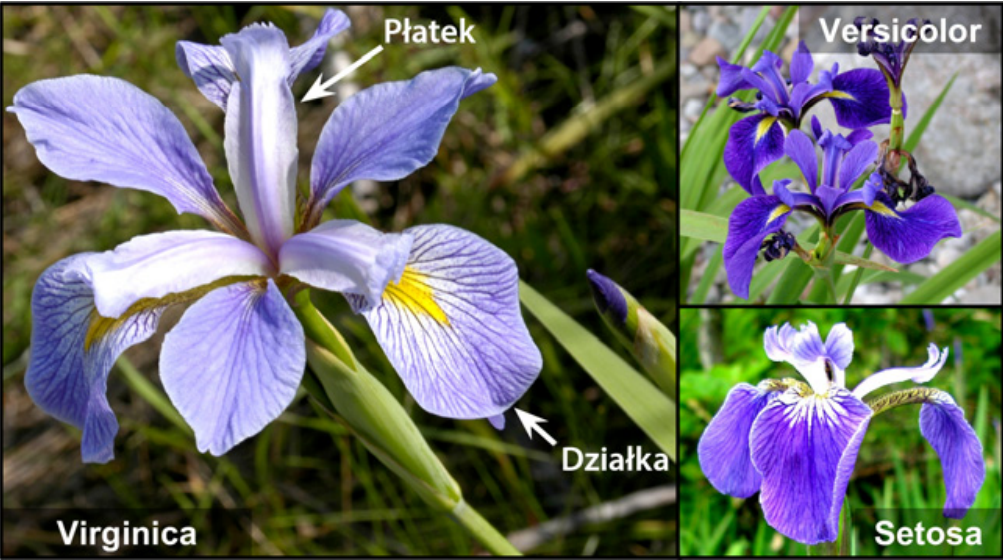

Uwaga! Zbiór zawiera wyłącznie pomiary. Nie działamy już na obrazach.

In [39]:
import pandas as pd
import sklearn

In [40]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Mamy czetry wymiary i 150 próbek. Ustandaryzujmy pomiary.

In [41]:
from sklearn.preprocessing import StandardScaler

variables = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, variables].values
y = df.loc[:,['target']]

x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Są czetry cechy w danych wejściowych, zatem PCA obliczy nam taką samą liczbę składowych głównych.

In [42]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


Popatrzmy ile wariancji tłumaczone jest przez kolejne składowe główne.

In [43]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

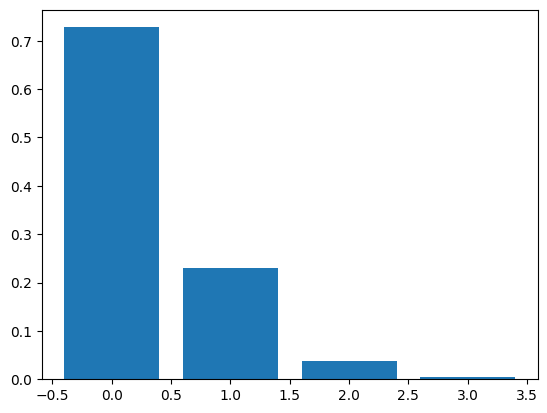

In [44]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

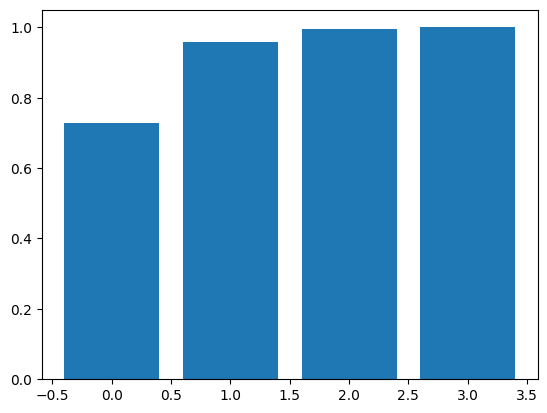

In [45]:
# kumulanta
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

Pierwsz składowa główn tłumaczy ponad 72% zmienności sygnału, druga 23%, trzecia 3.6%, a czwarta 0.51%.

72.22% + 23.9% = 96.21% zmienności sygnału jest tłumaczone przez same, dwie pierwsze składowe główne.

In [46]:
x_pca['target']=y
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'target']
x_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


Patrząc na stopień objaśnienia wariancji przez pierwsze dwie składowe główne prawdopodbna jest teza, że do reprezentacji sygnału wystarczą nam te dwie składowe.

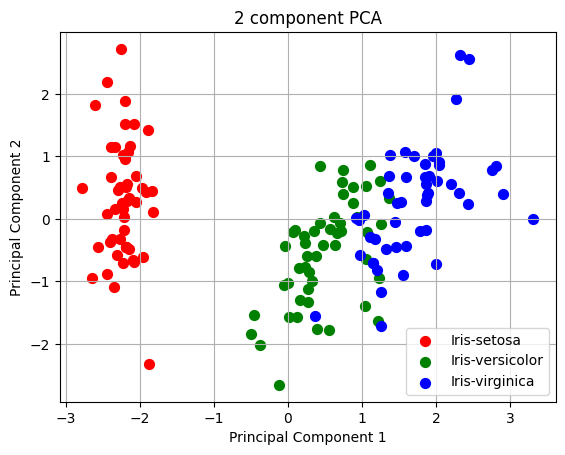

In [47]:
# The outcome shows the data are separable in the new space.
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = x_pca['target'] == target
    ax.scatter(
        x_pca.loc[indicesToKeep, 'PC1'], 
        x_pca.loc[indicesToKeep, 'PC2'], 
        c = color, 
        s = 50
    )
ax.legend(targets)
ax.grid()

Widzimy, że dodatkowo te dwie zmienne separują nam ładnie cały zbiór.

Ok, wszystko działa. Ale w jaki sposób sklearn znajduje te składowe główne? Jaka matematyk jest pod spodem?

### Zadanie I Gatunki ryb

W pliku 'Dane/fish.csv' znajdują się pomiary 158 ryb z siedmiu różnych gatunków. Wczytaj dane, popatrz na cechy (nawet patrząc po samych nazwach sprawiają wrażenie nadmiarowych). Przeprowadź analizę składowych głównych. Przedstaw dane na wykresie zachowując conajmniej 80% wariancji w danych.

### Zadanie II Zwyczaje żywieniowe

W pliku '../Dane/food.txt' znajdują się dane dotyczące zwyczajów żywieniowych w czterech krajach Wielkiej Brytanii - Anglii, Walii, Szkocji i Irlandii Północnej. Dane przedstawiają przypadające na jednego człowieka średnie, tygodniowe spożycie poszczególnych produktów spożywczych w gramach. Więcej o danych można poczytać tutaj http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf

### Zadanie 3 Charakterystyki miast

W pliku '../Dane/cities.txt' znajdują się dane dotyczące 46 miast świata. Zredukuj wymiary, nanieś dane na wykres, wskaż miasta, w których żyje się najlepiej.

In [49]:
import pandas as pd

df = pd.read_csv('../Dane/cities.txt', delimiter='\t+')
df

C:\Users\User\AppData\Local\Temp\ipykernel_39348\1990325711.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../Dane/cities.txt', delimiter='\t+')


,Work,Price,Salary
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
BuenosAires,1971,56.1,12.5
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9
Copenhagen,1717,91.3,62.9
Dublin,1759,76.0,41.4


In [51]:
x = df.loc[:, ['Work', 'Price', 'Salary']].values
x

array([[1714. ,   65.6,   49. ],
       [1792. ,   53.8,   30.4],
       [2152. ,   37.9,   11.5],
       [2052. ,   30.3,    5.3],
       [1708. ,   73.8,   50.5],
       [1971. ,   56.1,   12.5],
       [2041. ,   61. ,   10.9],
       [1924. ,   73.9,   61.9],
       [1717. ,   91.3,   62.9],
       [1759. ,   76. ,   41.4],
       [1693. ,   78.5,   60.2],
       [1650. ,   74.5,   60.4],
       [1880. ,   95.9,   90.3],
       [1667. ,  113.6,   66.6],
       [2375. ,   63.8,   27.8],
       [1978. ,   71.9,   46.3],
       [1945. ,   51.1,   24. ],
       [2167. ,   43.5,    9.9],
       [1786. ,   45.2,    2.7],
       [1742. ,   56.2,   18.8],
       [1737. ,   84.2,   46.2],
       [2068. ,   79.8,   65.2],
       [1768. ,   71.1,   71.1],
       [1710. ,   93.8,   50. ],
       [2268. ,   40. ,    4. ],
       [1944. ,   49.8,    5.7],
       [1773. ,   82. ,   53.3],
       [1827. ,   72.7,   56.3],
       [1958. ,   45. ,    5.8],
       [1942. ,   83.3,   65.8],
       [18

In [54]:
y = df.index.values.tolist()
y

['Amsterdam',
 'Athens',
 'Bogota',
 'Bombay',
 'Brussels',
 'BuenosAires',
 'Caracas',
 'Chicago',
 'Copenhagen',
 'Dublin',
 'Dusseldorf',
 'Frankfurt',
 'Geneva',
 'Helsinki',
 'HongKong',
 'Houston',
 'Johannesburg',
 'KualaLumpur',
 'Lagos',
 'Lisbon',
 'London',
 'LosAngeles',
 'Luxembourg',
 'Madrid',
 'Manila',
 'MexicoCity',
 'Milan',
 'Montreal',
 'Nairobi',
 'NewYork',
 'Nicosia',
 'Oslo',
 'Panama',
 'Paris',
 'RiodeJaneiro',
 'SaoPaulo',
 'Seoul',
 'Singpore',
 'Stockholm',
 'Sydney',
 'Taipei',
 'TelAviv',
 'Tokyo',
 'Toronto',
 'Vienna',
 'Zurich']

In [57]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2
0,-0.962166,-0.212712,0.386095
1,-0.509827,-0.770489,-0.373488
2,1.577891,-1.522069,-1.145323
3,0.997969,-1.881316,-1.398517
4,-0.996961,0.174896,0.447351
5,0.528233,-0.661769,-1.104485
6,0.934178,-0.430150,-1.169825
7,0.255670,0.179623,0.912902
8,-0.944768,1.002108,0.953740
9,-0.701201,0.278888,0.075727


In [59]:
pca = PCA()

x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x.head()

,0,1,2
0,-0.962166,-0.212712,0.386095
1,-0.509827,-0.770489,-0.373488
2,1.577891,-1.522069,-1.145323
3,0.997969,-1.881316,-1.398517
4,-0.996961,0.174896,0.447351


In [62]:
pca.explained_variance_ratio_

array([0.72006788, 0.21454801, 0.0653841 ])

<BarContainer object of 3 artists>

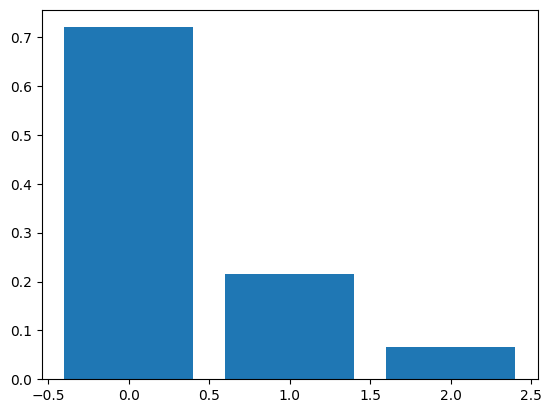

In [64]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)

In [67]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.72006788 0.9346159  1.        ]


In [71]:
x_pca['target'] = y

x_pca.columns = ['PC1', 'PC2', 'PC3', 'target']
x_pca.head()

,PC1,PC2,PC3,target
0,-0.574019,-0.785036,-0.417491,Amsterdam
1,0.460128,-0.839973,-0.275313,Athens
2,2.414362,0.463915,-0.271732,Bogota
3,2.511952,-0.253745,-0.341838,Bombay
4,-0.868293,-0.660013,-0.187329,Brussels


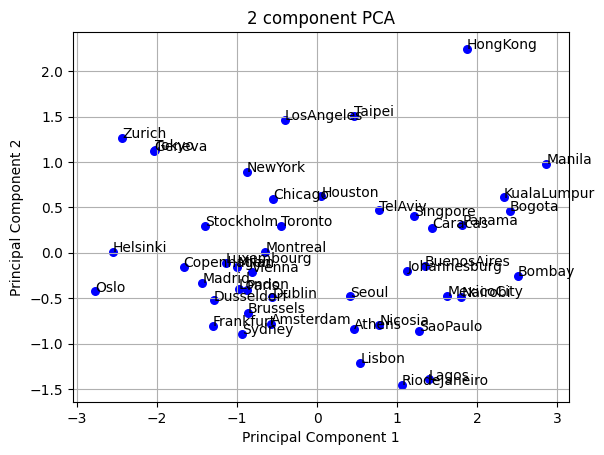

In [75]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = y

for target in targets:
    indicesToKeep = x_pca['target'] == target
    ax.scatter(
        x_pca.loc[indicesToKeep, 'PC1'], 
        x_pca.loc[indicesToKeep, 'PC2'], 
        c = color, 
        s = 30
    )
    ax.annotate(target, (x_pca.loc[indicesToKeep, 'PC1'], x_pca.loc[indicesToKeep, 'PC2']))

ax.grid()

In [76]:
pca.components_

array([[ 0.48475659, -0.61785157, -0.61908843],
       [ 0.87462508,  0.34766783,  0.33787283],
       [-0.00648187,  0.70525635, -0.70892275]])

In [77]:
pca.singular_values_

array([9.96841853, 5.441289  , 3.00383187])

In [80]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'])

,PC1,PC2,PC3
0,0.720350,0.709443,-0.002902
1,-0.918130,0.282007,0.315803
2,-0.919968,0.274062,-0.317445


### Zadanie 4 PCA na potrzeby regresji liniowej

W pliku '../Dane/longley.csv' znajdują się dane dotyczące makroekonomii Stanów Zjednoczonych (szczegółowe informacje można znaleźć tutaj https://stat.ethz.ch/R-manual/R-patched/library/datasets/html/longley.html)

*Ciekawostka. Połączenie regresji liniowej i analizy składowych głównych nosi nazwę Principal Component Regression (PCR)*

In [84]:
df = pd.read_csv('../Dane/longley.csv', index_col=0)
df

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019
1956,104.6,419.180,282.2,285.7,118.734,1956,67.857


In [86]:
df.corr()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
GNP.deflator,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149,0.970899
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273,0.983552
Unemployed,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257,0.502498
Armed.Forces,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245,0.457307
Population,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953,0.960391
Year,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000,0.971329
Employed,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329,1.000000


In [88]:
x = df.iloc[:, [0,1,2,3,4]]
x

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
1947,83.0,234.289,235.6,159.0,107.608
1948,88.5,259.426,232.5,145.6,108.632
1949,88.2,258.054,368.2,161.6,109.773
1950,89.5,284.599,335.1,165.0,110.929
1951,96.2,328.975,209.9,309.9,112.075
1952,98.1,346.999,193.2,359.4,113.270
1953,99.0,365.385,187.0,354.7,115.094
1954,100.0,363.112,357.8,335.0,116.219
1955,101.2,397.469,290.4,304.8,117.388
1956,104.6,419.180,282.2,285.7,118.734


In [90]:
y = df.iloc[:, -1]
y

1947    60.323
1948    61.122
1949    60.171
1950    61.187
1951    63.221
1952    63.639
1953    64.989
1954    63.761
1955    66.019
1956    67.857
1957    68.169
1958    66.513
1959    68.655
1960    69.564
1961    69.331
1962    70.551
Name: Employed, dtype: float64

In [102]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,-1.787872,-1.594051,-0.925421,-1.508839,-1.457414
1,-1.261499,-1.332857,-0.959683,-1.707704,-1.305378
2,-1.290210,-1.347113,0.540111,-1.470253,-1.135969
3,-1.165795,-1.071288,0.174281,-1.419794,-0.964334
4,-0.524578,-0.610185,-1.209464,0.730628,-0.794184


In [95]:
pca = PCA()

x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4
0,3.204945,-0.776652,-0.301445,0.169601,-0.006442
1,2.773855,-0.877361,-0.653574,-0.126642,-0.043745
2,2.104761,-1.590765,0.512299,0.008744,-0.008121
3,1.929308,-1.318500,0.128822,0.059864,0.044926
4,1.279159,1.276178,0.023850,-0.096544,0.009416


In [96]:
pca.explained_variance_ratio_

array([7.21933818e-01, 2.35067974e-01, 3.98310724e-02, 2.97644915e-03,
       1.90686838e-04])

In [98]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.72193382 0.95700179 0.99683286 0.99980931 1.        ]


In [106]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)


x_pca.columns = ['PC1', 'PC2', 'PC3']
x_pca.head()

,PC1,PC2,PC3
0,3.204945,-0.776652,-0.301445
1,2.773855,-0.877361,-0.653574
2,2.104761,-1.590765,0.512299
3,1.929308,-1.318500,0.128822
4,1.279159,1.276178,0.023850


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
np.mean(cross_val_score(lm, x, y, scoring='neg_mean_squared_error'))

-2.6811458038288216

In [105]:
lm = LinearRegression()
np.mean(cross_val_score(lm, x_pca, y, scoring='neg_mean_squared_error'))

-2.121512074298604

### Technikalia

Metoda PCA wykorzystuje narzędzia dostarczane przez algebrę liniową. Do najważniejszych zagadnień wykorzystywanych w PCA należą: wektor, macierz, mnożenie macierzy, wyznacznik macierzy, rozkład (faktoryzacja) macierzy, SVD, wektory i wartości własne macierzy. Szczegółowo nie będziemy omawiali tych zagadnień, ale warto nakreślić intuicje matematyczną.

W przypadku chęci pogłębienia wiedzy matematycznej materiałmi wartymi uwagi są:

* [Czym są wektory ?](https://www.youtube.com/watch?v=2OGJvGAniRU)
* [3Blue1Brown Linear Algebra course](https://www.youtube.com/watch?v=kjBOesZCoqc&list=PL0-GT3co4r2y2YErbmuJw2L5tW4Ew2O5B)
* [Gilbert Strang - Matrix methods in Data Analysis, Signal Processing, and Machine Learning](https://www.youtube.com/watch?v=Cx5Z-OslNWE&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k)